In [66]:
import numpy as np
import pandas as pd
from scipy.stats import pointbiserialr
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [67]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_absolute_percentage_error,mean_squared_error,mean_absolute_percentage_error
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,Normalizer,RobustScaler
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,StratifiedKFold,LeaveOneOut,LeavePOut,validation_curve,learning_curve
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,VotingRegressor,StackingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor,XGBRFRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge,ARDRegression,Lasso, Ridge

## Cleaning the dataset for Thermal Conductivity 

In [68]:
df_raw=pd.read_excel('Book1-3.xlsx')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  94 non-null     float64
 1   SiC                   94 non-null     float64
 2   TiB2                  94 non-null     int64  
 3   TiSi2                 94 non-null     int64  
 4   ZrC                   94 non-null     float64
 5   ZrSi2                 94 non-null     int64  
 6   MoSi2                 94 non-null     float64
 7   B4C                   94 non-null     float64
 8   Si3N4                 94 non-null     int64  
 9   TaSi2                 94 non-null     int64  
 10  purity                30 non-null     float64
 11  Sinter method         94 non-null     object 
 12  Sinter temp           81 non-null     float64
 13  Relative Density      89 non-null     float64
 14  GS in microns         44 non-null     float64
 15  Temp                  94 

In [69]:
df_raw=df_raw.drop(['purity',"TiB2",'GS in microns'],axis=1)

In [70]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  94 non-null     float64
 1   SiC                   94 non-null     float64
 2   TiSi2                 94 non-null     int64  
 3   ZrC                   94 non-null     float64
 4   ZrSi2                 94 non-null     int64  
 5   MoSi2                 94 non-null     float64
 6   B4C                   94 non-null     float64
 7   Si3N4                 94 non-null     int64  
 8   TaSi2                 94 non-null     int64  
 9   Sinter method         94 non-null     object 
 10  Sinter temp           81 non-null     float64
 11  Relative Density      89 non-null     float64
 12  Temp                  94 non-null     int64  
 13  Thermal Conductivity  94 non-null     float64
dtypes: float64(8), int64(5), object(1)
memory usage: 10.4+ KB
<class 'pandas.cor

In [71]:
df_raw=df_raw.drop(['TiSi2'],axis=1)

In [72]:
df_raw['Sinter method'] = df_raw['Sinter method'].replace({
    'HP': 1,
    'SPS': 2,
    'PS': 3
})
print(df_raw)

     ZrB2   SiC   ZrC  ZrSi2  MoSi2  B4C  Si3N4  TaSi2  Sinter method  \
0   100.0   0.0   0.0      0    0.0  0.0      0      0              3   
1   100.0   0.0   0.0      0    0.0  0.0      0      0              1   
2   100.0   0.0   0.0      0    0.0  0.0      0      0              1   
3   100.0   0.0   0.0      0    0.0  0.0      0      0              1   
4   100.0   0.0   0.0      0    0.0  0.0      0      0              1   
..    ...   ...   ...    ...    ...  ...    ...    ...            ...   
89   55.0  15.0  30.0      0    0.0  0.0      0      0              2   
90   74.0  18.0   8.0      0    0.0  0.0      0      0              2   
91   63.0  25.0  12.0      0    0.0  0.0      0      0              2   
92   51.0  33.0  16.0      0    0.0  0.0      0      0              2   
93   61.0   4.0  35.0      0    0.0  0.0      0      0              2   

    Sinter temp  Relative Density  Temp  Thermal Conductivity  
0           NaN              85.0    25                  25

In [73]:
empty=df_raw[df_raw['Sinter temp'].isna()].index
empty=empty.to_numpy()
df_raw=df_raw.drop(empty)
df_raw=df_raw.reset_index(drop=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  81 non-null     float64
 1   SiC                   81 non-null     float64
 2   ZrC                   81 non-null     float64
 3   ZrSi2                 81 non-null     int64  
 4   MoSi2                 81 non-null     float64
 5   B4C                   81 non-null     float64
 6   Si3N4                 81 non-null     int64  
 7   TaSi2                 81 non-null     int64  
 8   Sinter method         81 non-null     int64  
 9   Sinter temp           81 non-null     float64
 10  Relative Density      78 non-null     float64
 11  Temp                  81 non-null     int64  
 12  Thermal Conductivity  81 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 8.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns

In [74]:
empty=df_raw[df_raw['Relative Density'].isna()].index
empty=empty.to_numpy()
df_raw=df_raw.drop(empty)
df_raw=df_raw.reset_index(drop=True)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  78 non-null     float64
 1   SiC                   78 non-null     float64
 2   ZrC                   78 non-null     float64
 3   ZrSi2                 78 non-null     int64  
 4   MoSi2                 78 non-null     float64
 5   B4C                   78 non-null     float64
 6   Si3N4                 78 non-null     int64  
 7   TaSi2                 78 non-null     int64  
 8   Sinter method         78 non-null     int64  
 9   Sinter temp           78 non-null     float64
 10  Relative Density      78 non-null     float64
 11  Temp                  78 non-null     int64  
 12  Thermal Conductivity  78 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 8.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns

In [75]:
df_raw=df_raw.drop_duplicates()
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  78 non-null     float64
 1   SiC                   78 non-null     float64
 2   ZrC                   78 non-null     float64
 3   ZrSi2                 78 non-null     int64  
 4   MoSi2                 78 non-null     float64
 5   B4C                   78 non-null     float64
 6   Si3N4                 78 non-null     int64  
 7   TaSi2                 78 non-null     int64  
 8   Sinter method         78 non-null     int64  
 9   Sinter temp           78 non-null     float64
 10  Relative Density      78 non-null     float64
 11  Temp                  78 non-null     int64  
 12  Thermal Conductivity  78 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 8.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming filtered_df is your DataFrame
x = df_raw[['ZrB2', 'SiC', 'ZrC',
       'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2', 'Relative Density',
       'Temp']]
y = df_raw[['Thermal Conductivity']]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the testing data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 322.79101659862096
R^2 Score: 0.4055304580220246
Mean Squared Error: 322.79101659862096
R^2 Score: 0.4055304580220246


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming filtered_df is your DataFrame
x = df_raw[['ZrB2', 'SiC', 'ZrC',
       'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2', 'Relative Density',
       'Temp']]
y = df_raw['Thermal Conductivity']  # Changed to Series

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(x_train, y_train)

# Predict on the training and testing data
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE) for training and testing data
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)

# Calculate the R² score for training and testing data
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("Training R^2 Score:", train_r2)
print("Testing R^2 Score:", test_r2)


Training Mean Squared Error: 198.23452332137802
Testing Mean Squared Error: 322.79101659862096
Training R^2 Score: 0.5350035631571946
Testing R^2 Score: 0.4055304580220246
Training Mean Squared Error: 198.23452332137802
Testing Mean Squared Error: 322.79101659862096
Training R^2 Score: 0.5350035631571946
Testing R^2 Score: 0.4055304580220246


In [78]:
import pandas as pd


conditions = [
    (df_raw['Temp'] <= 100),
    (df_raw['Temp'] > 100) & (df_raw['Temp'] <= 500),
    (df_raw['Temp'] > 500) & (df_raw['Temp'] <= 1000),

    (df_raw['Temp'] > 1000) & (df_raw['Temp'] <= 1500),
    (df_raw['Temp'] > 1500)
]

labels = [0, 1,2, 3, 4]

# Use np.select to assign the labels based on the conditions
df_raw['Label'] = pd.Series(pd.NA, index=df_raw.index)  # Create an empty column 'Label'

df_raw['Label'] = pd.Series(
    pd.NA, dtype=pd.Int64Dtype(), index=df_raw.index
) 


df_raw['Label'] = np.select(conditions, labels, default=df_raw['Label'])

# Show the updated DataFrame
df_raw

,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity,Label
0,100.0,0.0,0.0,0,0.0,0.0,0,0,3,2100.0,100.0,2200,55.0,4
1,100.0,0.0,0.0,0,0.0,0.0,0,0,1,2000.0,75.0,2000,43.0,4
2,100.0,0.0,0.0,0,0.0,0.0,0,0,1,1900.0,100.0,1325,67.0,3
3,100.0,0.0,0.0,0,0.0,0.0,0,0,1,1900.0,100.0,25,56.0,0
4,100.0,0.0,0.0,0,0.0,0.0,0,0,2,1900.0,95.6,25,113.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,55.0,15.0,30.0,0,0.0,0.0,0,0,2,1950.0,98.8,25,74.0,0
74,74.0,18.0,8.0,0,0.0,0.0,0,0,2,2000.0,85.7,25,71.0,0
75,63.0,25.0,12.0,0,0.0,0.0,0,0,2,2000.0,85.5,25,71.0,0
76,51.0,33.0,16.0,0,0.0,0.0,0,0,2,2000.0,96.5,25,60.0,0


,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity,Label
0,100.0,0.0,0.0,0,0.0,0.0,0,0,3,2100.0,100.0,2200,55.0,4
1,100.0,0.0,0.0,0,0.0,0.0,0,0,1,2000.0,75.0,2000,43.0,4
2,100.0,0.0,0.0,0,0.0,0.0,0,0,1,1900.0,100.0,1325,67.0,3
3,100.0,0.0,0.0,0,0.0,0.0,0,0,1,1900.0,100.0,25,56.0,0
4,100.0,0.0,0.0,0,0.0,0.0,0,0,2,1900.0,95.6,25,113.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,55.0,15.0,30.0,0,0.0,0.0,0,0,2,1950.0,98.8,25,74.0,0
74,74.0,18.0,8.0,0,0.0,0.0,0,0,2,2000.0,85.7,25,71.0,0
75,63.0,25.0,12.0,0,0.0,0.0,0,0,2,2000.0,85.5,25,71.0,0
76,51.0,33.0,16.0,0,0.0,0.0,0,0,2,2000.0,96.5,25,60.0,0


In [79]:
df_raw.groupby(['Label']).count()

,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity
Label,,,,,,,,,,,,,
0,50,50,50,50,50,50,50,50,50,50,50,50,50
3,8,8,8,8,8,8,8,8,8,8,8,8,8
4,20,20,20,20,20,20,20,20,20,20,20,20,20


,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity
Label,,,,,,,,,,,,,
0,50,50,50,50,50,50,50,50,50,50,50,50,50
3,8,8,8,8,8,8,8,8,8,8,8,8,8
4,20,20,20,20,20,20,20,20,20,20,20,20,20


In [80]:
import pandas as pd

# Assuming df_raw is your DataFrame
desired_label_rows = df_raw[df_raw["Label"] == 2]
print(desired_label_rows)


Empty DataFrame
Columns: [ZrB2, SiC, ZrC, ZrSi2, MoSi2, B4C, Si3N4, TaSi2, Sinter method, Sinter temp, Relative Density, Temp, Thermal Conductivity, Label]
Index: []
Empty DataFrame
Columns: [ZrB2, SiC, ZrC, ZrSi2, MoSi2, B4C, Si3N4, TaSi2, Sinter method, Sinter temp, Relative Density, Temp, Thermal Conductivity, Label]
Index: []


In [81]:
# Remove rows with missing 'Label' values
df_raw = df_raw.dropna(subset=['Label'])

# Convert 'Label' column to integers
df_raw['Label'] = df_raw['Label'].astype(int)


## Applying Synthetic Minority Oversampling Technique

In [82]:
from imblearn.over_sampling import ADASYN, SMOTE, BorderlineSMOTE,SMOTENC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from imblearn.pipeline import Pipeline

smote = SMOTE(random_state=44)
BLS= BorderlineSMOTE(random_state=44, sampling_strategy='all')
adasyn = ADASYN(random_state=44)
logreg = LogisticRegression()
knn = KNeighborsClassifier()
clf = tree.DecisionTreeClassifier()
svc = svm.SVC()
sgd = SGDClassifier()

adasyn_pipe = Pipeline([('sampler', smote), ('classifier', clf)])

params = dict(sampler__k_neighbors=range(2, 6))
adasyn_grid = GridSearchCV(adasyn_pipe, params)


# succeeds
adasyn_grid.fit(df_raw.iloc[:,:-1], df_raw.iloc[:,-1])

GridSearchCV(estimator=Pipeline(steps=[('sampler', SMOTE(random_state=44)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'sampler__k_neighbors': range(2, 6)})

GridSearchCV(estimator=Pipeline(steps=[('sampler', SMOTE(random_state=44)),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'sampler__k_neighbors': range(2, 6)})

In [83]:
ada = SMOTE(random_state = 44, k_neighbors = 2)
X_res, y_res = ada.fit_resample(df_raw.iloc[:,:-1], df_raw.iloc[:,-1])

Ada_data = pd.concat([X_res, y_res], axis=1)
Ada_data = Ada_data.drop_duplicates()
Ada_data

,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity,Label
0,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,3,2100.000000,100.0,2200,55.000000,4
1,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,2000.000000,75.0,2000,43.000000,4
2,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,1900.000000,100.0,1325,67.000000,3
3,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,1900.000000,100.0,25,56.000000,0
4,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,2,1900.000000,95.6,25,113.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,55.349486,0.000000,44.650514,0,0.0,0.0,0,0,3,2100.000000,100.0,2153,53.360764,4
146,94.408364,5.591636,0.000000,0,0.0,0.0,0,0,1,2000.000000,101.0,2000,81.763345,4
147,95.726261,0.000000,4.273739,0,0.0,0.0,0,0,1,2145.251401,100.0,2104,72.929611,4
148,89.129928,0.000000,10.870072,0,0.0,0.0,0,0,3,2100.000000,100.0,2200,66.467926,4


,ZrB2,SiC,ZrC,ZrSi2,MoSi2,B4C,Si3N4,TaSi2,Sinter method,Sinter temp,Relative Density,Temp,Thermal Conductivity,Label
0,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,3,2100.000000,100.0,2200,55.000000,4
1,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,2000.000000,75.0,2000,43.000000,4
2,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,1900.000000,100.0,1325,67.000000,3
3,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,1,1900.000000,100.0,25,56.000000,0
4,100.000000,0.000000,0.000000,0,0.0,0.0,0,0,2,1900.000000,95.6,25,113.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,55.349486,0.000000,44.650514,0,0.0,0.0,0,0,3,2100.000000,100.0,2153,53.360764,4
146,94.408364,5.591636,0.000000,0,0.0,0.0,0,0,1,2000.000000,101.0,2000,81.763345,4
147,95.726261,0.000000,4.273739,0,0.0,0.0,0,0,1,2145.251401,100.0,2104,72.929611,4
148,89.129928,0.000000,10.870072,0,0.0,0.0,0,0,3,2100.000000,100.0,2200,66.467926,4


In [84]:
X1 = Ada_data[['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density',"Temp"]]
Y1 = Ada_data['Thermal Conductivity']

In [85]:
print(Ada_data.columns)

Index(['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp',
       'Thermal Conductivity', 'Label'],
      dtype='object')
Index(['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp',
       'Thermal Conductivity', 'Label'],
      dtype='object')


In [86]:
df_raw=Ada_data
df_raw=df_raw.drop(['Label'],axis=1)
train_dataset = df_raw.sample(frac=0.8, random_state=44)
test_dataset = df_raw.drop(train_dataset.index)
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 147
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ZrB2                  30 non-null     float64
 1   SiC                   30 non-null     float64
 2   ZrC                   30 non-null     float64
 3   ZrSi2                 30 non-null     int64  
 4   MoSi2                 30 non-null     float64
 5   B4C                   30 non-null     float64
 6   Si3N4                 30 non-null     int64  
 7   TaSi2                 30 non-null     int64  
 8   Sinter method         30 non-null     int64  
 9   Sinter temp           30 non-null     float64
 10  Relative Density      30 non-null     float64
 11  Temp                  30 non-null     int64  
 12  Thermal Conductivity  30 non-null     float64
dtypes: float64(8), int64(5)
memory usage: 3.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 1 to 147
Data columns (total 

In [87]:
y_train = train_dataset.pop('Thermal Conductivity') #y_train
y_test = test_dataset.pop('Thermal Conductivity')   # y_test

## Trying ML different models

In [88]:
from sklearn.impute import SimpleImputer,KNNImputer

imptrain = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imptest = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

Train_scaler = MinMaxScaler()
Test_scaler = MinMaxScaler()


X_train_scaled = Train_scaler.fit_transform(train_dataset)
X_test_scaled = Test_scaler.fit_transform(test_dataset)

imptrain.fit(X_train_scaled)
imptest.fit(X_test_scaled)

X_train_scaled = imptrain.transform(X_train_scaled)
X_test_scaled = imptest.transform(X_test_scaled)

In [89]:
from sklearn.metrics import mean_absolute_error, r2_score
from xgboost import XGBRegressor

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Predict on the testing set
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    if verbose:
        
        #print("Train MAE = {:.4f} in {}".format(train_mae, model_name))
        # print("Train R^2 = {:.4f} in {}".format(train_r2, model_name))
        #print("Test MAE = {:.4f} in {}".format(test_mae, model_name))
        print(".".format(test_r2, model_name))
        
    return model, y_test_pred, train_mae, train_r2, test_mae, test_r2

# Assuming you have a dictionary of regression models
regression_models = {
    "DecisionTree": DecisionTreeRegressor(random_state=44),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state=44),
    "XGBoost": XGBRegressor(random_state=44),
    "KRR": KernelRidge(),
    "ABR": AdaBoostRegressor(random_state=44),
    "GBR": GradientBoostingRegressor(random_state=44),
    "ETR": ExtraTreesRegressor(random_state=44),
    "KNN": KNeighborsRegressor()
}

# Iterate over the dictionary of models
for model_name, model in regression_models.items():
    _, y_test_pred, train_mae, train_r2, test_mae, test_r2 = make_regression(X_train_scaled, y_train, X_test_scaled, y_test, model, model_name, verbose=True)
    print("R2 of", model_name, "=", test_r2)
    print("MAE of", model_name, "=", test_mae)
    print("Train MAE of", model_name, "=", train_mae)
    print("Train R2 of", model_name, "=", train_r2)


.
R2 of DecisionTree = 0.3499185654024458
MAE of DecisionTree = 9.24007867729185
Train MAE of DecisionTree = 0.8333333333333334
Train R2 of DecisionTree = 0.949420796394662
.
R2 of DecisionTree = 0.3499185654024458
MAE of DecisionTree = 9.24007867729185
Train MAE of DecisionTree = 0.8333333333333334
Train R2 of DecisionTree = 0.949420796394662
.
R2 of SVR = 0.12662538462346584
MAE of SVR = 13.07888141123097
Train MAE of SVR = 11.414464872896822
Train R2 of SVR = 0.18286396026345708
.
R2 of SVR = 0.12662538462346584
MAE of SVR = 13.07888141123097
Train MAE of SVR = 11.414464872896822
Train R2 of SVR = 0.18286396026345708
.
R2 of RandomForest = 0.6728771891987974
MAE of RandomForest = 7.82682293835684
Train MAE of RandomForest = 3.3812802884640325
Train R2 of RandomForest = 0.8883245624198357
.
R2 of XGBoost = 0.7691374617678814
MAE of XGBoost = 6.566251987119356
Train MAE of XGBoost = 0.8438270690595372
Train R2 of XGBoost = 0.9494199111072851
.
R2 of KRR = 0.3607990170819845
MAE of KRR

In [90]:
def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    model.fit(X_train,y_train)
    y_predict=model.predict(X_train)
    train_error = mean_absolute_error(y_train, y_predict)
    y_predict=model.predict(X_test)
    test_error = mean_absolute_error(y_test, y_predict)
    
    if verbose:
        print("Train error = "'{}'.format(train_error)+" in " + model_name)
        print("Test error = "'{}'.format(test_error)+" in " + model_name)
    trained_model = model
    
    return trained_model, y_predict, train_error, test_error

In [91]:
regression_models = {
    "DecisionTree" : DecisionTreeRegressor(random_state=44),
    "SVR": SVR(),
    "RandomForest" : RandomForestRegressor(random_state=44),
    "XGBoost": XGBRegressor(random_state=44),
    "KRR":KernelRidge(),
    "ABR": AdaBoostRegressor(random_state=44),
    "GBR": GradientBoostingRegressor(random_state=44),
    "ETR": ExtraTreesRegressor(random_state=44),
    "KNN":KNeighborsRegressor()
}
for model_name in regression_models.keys():
    _, y_predict, _, _= make_regression(X_train_scaled, y_train, X_test_scaled, y_test,regression_models[model_name], model_name, verbose=True)
    print("R2 of",model_name,"=", r2_score(y_test,y_predict),"\n"),
    print("MAE of",model_name,"=", mean_absolute_error(y_test,y_predict),"\n")

Train error = 0.8333333333333334 in DecisionTree
Test error = 9.24007867729185 in DecisionTree
R2 of DecisionTree = 0.3499185654024458 

MAE of DecisionTree = 9.24007867729185 

Train error = 11.414464872896822 in SVR
Test error = 13.07888141123097 in SVR
R2 of SVR = 0.12662538462346584 

MAE of SVR = 13.07888141123097 

Train error = 0.8333333333333334 in DecisionTree
Test error = 9.24007867729185 in DecisionTree
R2 of DecisionTree = 0.3499185654024458 

MAE of DecisionTree = 9.24007867729185 

Train error = 11.414464872896822 in SVR
Test error = 13.07888141123097 in SVR
R2 of SVR = 0.12662538462346584 

MAE of SVR = 13.07888141123097 

Train error = 3.3812802884640325 in RandomForest
Test error = 7.82682293835684 in RandomForest
R2 of RandomForest = 0.6728771891987974 

MAE of RandomForest = 7.82682293835684 

Train error = 3.3812802884640325 in RandomForest
Test error = 7.82682293835684 in RandomForest
R2 of RandomForest = 0.6728771891987974 

MAE of RandomForest = 7.82682293835684 

In [92]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(random_state=42)

# Train the model
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred = extra_trees.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 113.20742903401522
R^2 Score: 0.7606369469613115
Mean Squared Error: 113.20742903401522
R^2 Score: 0.7606369469613115


## Final model for Thermal conductivity

In [93]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred_test = extra_trees.predict(X_test)
y_pred_train = extra_trees.predict(X_train)

# Calculate Mean Squared Error for testing set
mse_test = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test):", mse_test)

# Calculate Mean Absolute Error for testing set
mae_test = mean_absolute_error(y_test, y_pred_test)
print("Mean Absolute Error (Test):", mae_test)

# Calculate R² score for testing set
r2_test = r2_score(y_test, y_pred_test)
print("R² Score (Test):", r2_test)

# Calculate Mean Absolute Error for training set
mae_train = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error (Train):", mae_train)

# Calculate R² score for training set
r2_train = r2_score(y_train, y_pred_train)
print("R² Score (Train):", r2_train)


Mean Squared Error (Test): 113.20742903401522
Mean Absolute Error (Test): 6.5713576758962295
R² Score (Test): 0.7606369469613115
Mean Absolute Error (Train): 0.6956666666667102
R² Score (Train): 0.9489418345572966
Mean Squared Error (Test): 113.20742903401522
Mean Absolute Error (Test): 6.5713576758962295
R² Score (Test): 0.7606369469613115
Mean Absolute Error (Train): 0.6956666666667102
R² Score (Train): 0.9489418345572966


In [94]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming X1 and Y1 are your features and target variable respectively

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(random_state=42)

# Define hyperparameters grid for Extra Trees Regressor
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=extra_trees, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2_test = r2_score(y_test, y_pred)
print("R^2 Score (Test):", r2_test)

# Evaluate the model on the training set
r2_train = best_model.score(X_train, y_train)
print("R^2 Score (Train):", r2_train)
print("Best Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mean Squared Error: 180.14481030052985
R^2 Score (Test): 0.6191061651117082
R^2 Score (Train): 0.8286530119258002
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error: 180.14481030052985
R^2 Score (Test): 0.6191061651117082
R^2 Score (Train): 0.8286530119258002
Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


In [95]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
mae_scores = []
r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X1)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X1.iloc[train_index], X1.iloc[val_index]
    y_train, y_val = Y1.iloc[train_index], Y1.iloc[val_index]
   
    # Make predictions on the validation set
    y_pred = best_model.predict(X_val)
    
    # Calculate evaluation metrics for this fold
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # Append scores to lists
    mse_scores.append(mse)
    mae_scores.append(mae)
    r2_scores.append(r2)
    
    # Print evaluation metrics for this fold
    print(f"  Validation R^2: {r2:.4f}")
    print(f"  Validation MSE: {mse:.4f}")
    print(f"  Validation MAE: {mae:.4f}")

# Calculate the average scores across all folds
average_mse = np.mean(mse_scores)
average_mae = np.mean(mae_scores)
average_r2 = np.mean(r2_scores)

print(f"\nAverage Validation MSE: {average_mse:.4f}")
print(f"Average Validation MAE: {average_mae:.4f}")
print(f"Average Validation R^2: {average_r2:.4f}")


Fold 1/5
  Validation R^2: 0.6191
  Validation MSE: 180.1448
  Validation MAE: 8.3850
Fold 2/5
  Validation R^2: 0.8998
  Validation MSE: 37.9411
  Validation MAE: 3.7329
Fold 3/5
  Validation R^2: 0.6978
  Validation MSE: 57.5616
  Validation MAE: 4.6866
Fold 4/5
  Validation R^2: 0.7744
  Validation MSE: 54.1303
  Validation MAE: 4.4587
Fold 5/5
  Validation R^2: 0.8539
  Validation MSE: 53.1332
  Validation MAE: 3.2405

Average Validation MSE: 76.5822
Average Validation MAE: 4.9007
Average Validation R^2: 0.7690
Fold 1/5
  Validation R^2: 0.6191
  Validation MSE: 180.1448
  Validation MAE: 8.3850
Fold 2/5
  Validation R^2: 0.8998
  Validation MSE: 37.9411
  Validation MAE: 3.7329
Fold 3/5
  Validation R^2: 0.6978
  Validation MSE: 57.5616
  Validation MAE: 4.6866
Fold 4/5
  Validation R^2: 0.7744
  Validation MSE: 54.1303
  Validation MAE: 4.4587
Fold 5/5
  Validation R^2: 0.8539
  Validation MSE: 53.1332
  Validation MAE: 3.2405

Average Validation MSE: 76.5822
Average Validation M

In [96]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
train_r2_scores = []
val_r2_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X1)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X1.iloc[train_index], X1.iloc[val_index]
    y_train, y_val = Y1.iloc[train_index], Y1.iloc[val_index]
    
    # Fit the model to the training data
    best_model.fit(X_train, y_train)

    
    # Calculate R² score for training data
    y_pred_train = best_model.predict(X_train)
    train_r2 = r2_score(y_train, y_pred_train)
    
    train_r2_scores.append(train_r2)
   
    
    print(f"  Training R^2: {train_r2:.4f}")
    



# Calculate the average R² score across all folds for training and validation data
average_train_r2 = np.mean(train_r2_scores)
print(f"\nAverage Training R²: {average_train_r2:.4f}")



Fold 1/5
  Training R^2: 0.8287
Fold 2/5
  Training R^2: 0.8806
Fold 3/5
  Training R^2: 0.9030
Fold 4/5
  Training R^2: 0.8763
Fold 5/5
  Training R^2: 0.8404

Average Training R²: 0.8658
Fold 1/5
  Training R^2: 0.8287
Fold 2/5
  Training R^2: 0.8806
Fold 3/5
  Training R^2: 0.9030
Fold 4/5
  Training R^2: 0.8763
Fold 5/5
  Training R^2: 0.8404

Average Training R²: 0.8658


## Applying Model trained for thermal conductivity on cleaned oxide scale thickness dataset

In [97]:
df=pd.read_csv('oxide_thickness_SiC_sorted.csv')
print(df.columns)

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Oxide Thickness (um)'],
      dtype='object')
Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Oxide Thickness (um)'],
      dtype='object')


In [98]:
X_tested = df[['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp']]

In [99]:
y_pred1 = best_model.predict(X_tested)


In [100]:
df["Thermal Conductivity"] = y_pred1
df

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,2,1600.00,100,10,98.7,800.00,1,60.0,200.0,60.178725
1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,1,1849.85,50,60,96.2,800.00,1,60.0,20.0,60.317113
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1950.00,350,60,98.0,2400.00,2,2.0,90.0,56.860628
3,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,...,3,1946.85,0,60,95.0,1526.85,1,0.0,400.0,52.769305
4,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,...,3,1946.85,0,60,95.0,1526.85,1,0.0,380.0,52.769305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0,82.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2100.00,32,9,100.0,1600.00,1,30.0,565.0,57.767680
217,77.6,0.0,22.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1650.00,60,120,97.9,1627.00,1,10.0,45.0,61.010619
218,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1950.00,32,45,98.0,2000.00,1,120.0,37.0,62.637512
219,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1950.00,32,45,98.0,2000.00,1,240.0,80.0,62.637512


,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,2,1600.00,100,10,98.7,800.00,1,60.0,200.0,60.178725
1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,1,1849.85,50,60,96.2,800.00,1,60.0,20.0,60.317113
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1950.00,350,60,98.0,2400.00,2,2.0,90.0,56.860628
3,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,...,3,1946.85,0,60,95.0,1526.85,1,0.0,400.0,52.769305
4,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,...,3,1946.85,0,60,95.0,1526.85,1,0.0,380.0,52.769305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0,82.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2,2100.00,32,9,100.0,1600.00,1,30.0,565.0,57.767680
217,77.6,0.0,22.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1650.00,60,120,97.9,1627.00,1,10.0,45.0,61.010619
218,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1950.00,32,45,98.0,2000.00,1,120.0,37.0,62.637512
219,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1950.00,32,45,98.0,2000.00,1,240.0,80.0,62.637512


In [101]:
X = df[['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',"Oxidation Test",
       'Temp', 'Time@Temp (min)',"Thermal Conductivity" ]]

Y = df["Oxide Thickness (um)"]

## Applying different ml models on new modified dataset

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming you have already split your data into features (X) and target variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create and fit the Random Forest Regression model
n_estimators = 100  # Number of trees in the forest
rf_regressor = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
rf_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred1 = rf_regressor.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred1)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred1)
print("R^2 Score:", r2)
from sklearn.metrics import mean_absolute_error

# Assuming y_test1 and y_pred1 are your true and predicted target values, respectively

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred1)
print("Mean Absolute Error:", mae)

Mean Squared Error: 44413.861291051915
R^2 Score: 0.4712112625633097
Mean Absolute Error: 131.04699924963927
Mean Squared Error: 44413.861291051915
R^2 Score: 0.4712112625633097
Mean Absolute Error: 131.04699924963927


In [103]:
from sklearn.metrics import mean_absolute_error, r2_score

def make_regression(X_train, y_train, X_test, y_test, model, model_name, verbose=True):
    """Apply selected regression model to data and measure error"""
    model.fit(X_train, y_train)
    
    # Predict on the training set
    y_train_pred = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    
    # Predict on the testing set
    y_test_pred = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    if verbose:
        
        #print("Train MAE = {:.4f} in {}".format(train_mae, model_name))
        # print("Train R^2 = {:.4f} in {}".format(train_r2, model_name))
        #print("Test MAE = {:.4f} in {}".format(test_mae, model_name))
        print(".".format(test_r2, model_name))
        
    return model, y_test_pred, train_mae, train_r2, test_mae, test_r2

# Assuming you have a dictionary of regression models
regression_models = {
    "DecisionTree": DecisionTreeRegressor(random_state=44),
    "SVR": SVR(),
    "RandomForest": RandomForestRegressor(random_state=44),
    "XGBoost": XGBRegressor(random_state=44),
    "KRR": KernelRidge(),
    "ABR": AdaBoostRegressor(random_state=44),
    "GBR": GradientBoostingRegressor(random_state=44),
    "ETR": ExtraTreesRegressor(random_state=44),
    "KNN": KNeighborsRegressor()
}

# Iterate over the dictionary of models
for model_name, model in regression_models.items():
    _, y_test_pred, train_mae, train_r2, test_mae, test_r2 = make_regression(X_train, y_train, X_test, y_test,regression_models[model_name], model_name, verbose=True)
    print("R2 of", model_name, "=", test_r2)
    print("MAE of", model_name, "=", test_mae)
    print("Train MAE of", model_name, "=", train_mae)
    print("Train R2 of", model_name, "=", train_r2)


.
R2 of DecisionTree = 0.17106271902542503
MAE of DecisionTree = 139.09
Train MAE of DecisionTree = 13.360795454545455
Train R2 of DecisionTree = 0.9653761619463574
.
R2 of DecisionTree = 0.17106271902542503
MAE of DecisionTree = 139.09
Train MAE of DecisionTree = 13.360795454545455
Train R2 of DecisionTree = 0.9653761619463574
.
R2 of SVR = -0.1905496200550043
MAE of SVR = 183.98876225269098
Train MAE of SVR = 178.80487123330806
Train R2 of SVR = -0.13082334173336463
.
R2 of SVR = -0.1905496200550043
MAE of SVR = 183.98876225269098
Train MAE of SVR = 178.80487123330806
Train R2 of SVR = -0.13082334173336463
.
R2 of RandomForest = 0.4911895321971631
MAE of RandomForest = 126.48287181657848
Train MAE of RandomForest = 43.8425089556277
Train R2 of RandomForest = 0.9325444034044063
.
R2 of RandomForest = 0.4911895321971631
MAE of RandomForest = 126.48287181657848
Train MAE of RandomForest = 43.8425089556277
Train R2 of RandomForest = 0.9325444034044063
.
R2 of XGBoost = 0.4615408802570138

In [104]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Train the model
extra_trees.fit(X_train, y_train)

# Predict on the test set
y_pred = extra_trees.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 43262.46730972533
R^2 Score: 0.48491968943680364
Mean Squared Error: 43262.46730972533
R^2 Score: 0.48491968943680364


## Final model for Oxidation layer thickness

In [105]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

# Assuming you have your data in a DataFrame 'data'
# X should contain the features and y should contain the t

# Split the data into training and testing sets
# Initialize the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=150, random_state=42)

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=50, random_state=42)

# Initialize the ensemble model using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('extra_trees', extra_trees),
    ('random_forest', random_forest)
])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the test set
y_pred = ensemble_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

Mean Squared Error: 41034.75482839302
R^2 Score: 0.5114426990588694
Mean Squared Error: 41034.75482839302
R^2 Score: 0.5114426990588694


In [106]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming you have your data in a DataFrame 'data'
# X should contain the features and y should contain the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor
extra_trees = ExtraTreesRegressor(n_estimators=150, random_state=42)

# Initialize the Random Forest Regressor
random_forest = RandomForestRegressor(n_estimators=50, random_state=42)

# Initialize the ensemble model using VotingRegressor
ensemble_model = VotingRegressor(estimators=[
    ('extra_trees', extra_trees),
    ('random_forest', random_forest)
])

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = ensemble_model.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error:", mse_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test R² Score:", r2_test)

# Predict on the training set
y_pred_train = ensemble_model.predict(X_train)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error:", mse_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train R² Score:", r2_train)


Test Mean Squared Error: 41034.75482839302
Test R² Score: 0.5114426990588694
Train Mean Squared Error: 4321.967635088955
Train R² Score: 0.9575512447750181
Test Mean Squared Error: 41034.75482839302
Test R² Score: 0.5114426990588694
Train Mean Squared Error: 4321.967635088955
Train R² Score: 0.9575512447750181


In [107]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, VotingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

# Assuming you have your data in a DataFrame 'data'
# X should contain the features and y should contain the target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Initialize the Extra Trees Regressor and Random Forest Regressor
extra_trees = ExtraTreesRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42)

# Define the hyperparameters grid for Extra Trees Regressor
param_grid_et = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Define the hyperparameters grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for Extra Trees Regressor
grid_search_et = GridSearchCV(estimator=extra_trees, param_grid=param_grid_et, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_et.fit(X_train, y_train)
best_et = grid_search_et.best_estimator_

# Initialize GridSearchCV for Random Forest Regressor
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search_rf.fit(X_train, y_train)
best_rf = grid_search_rf.best_estimator_

# Initialize the ensemble model using VotingRegressor with the best models
ensemble_model = VotingRegressor(estimators=[
    ('extra_trees', best_et),
    ('random_forest', best_rf)
])

# Define the hyperparameters grid for VotingRegressor
ensemble_params = {
    'weights': [[0.3, 0.7], [0.5, 0.5], [0.7, 0.3]]  # Adjust weights for each estimator
}

# Initialize GridSearchCV for ensemble model
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=ensemble_params, cv=5, scoring='neg_mean_squared_error', verbose=1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model2 = grid_search.best_estimator_

# Predict on the test set using the best model
y_pred_test = best_model2.predict(X_test)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, y_pred_test)
print("Test Mean Squared Error:", mse_test)
r2_test = r2_score(y_test, y_pred_test)
print("Test R² Score:", r2_test)

# Predict on the training set using the best model
y_pred_train = best_model2.predict(X_train)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_pred_train)
print("Train Mean Squared Error:", mse_train)
r2_train = r2_score(y_train, y_pred_train)
print("Train R² Score:", r2_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Parameters_rf:", best_rf)
print("Best Parameters_etr:", best_et)



Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Test Mean Squared Error: 43699.342361266055
Test R² Score: 0.4797182815833425
Train Mean Squared Error: 5474.402695701376
Train R² Score: 0.9462324571461012
Best Parameters: {'weights': [0.5, 0.5]}
Best Parameters_rf: RandomForestRegressor(max_depth=10, n_estimators=150, random_state=42)
Best Parameters_etr: ExtraTreesRegressor(max_depth=10, n_estimators=50, random_state=42)
Test Mean Squared Error: 43699.342361266055
Test R² Score: 0.4797182815833425
Train Mean Squared Error: 5474.402695701376
Train R² Score: 0.9462324571461012
Best Parameters: {'weights': [0.5, 0.5]}
Best Parameters_rf: RandomForestRegressor(max_depth=10, 

In [108]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the number of folds for cross-validation
num_folds = 5

# Initialize the KFold cross-validation splitter
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize lists to store the evaluation metrics for each fold
mse_scores = []
r2_scores = []
train_r2_scores = []
mae_scores = []

# Iterate over each fold
for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
   
    # Train the model
    best_model2.fit(X_train, y_train)
    # Make predictions on the training set
    y_pred_train = best_model2.predict(X_train)
    
    # Calculate training R² score for this fold
    train_r2 = r2_score(y_train, y_pred_train)
    train_r2_scores.append(train_r2)
    
    print(f"  Train R^2: {train_r2:.4f}")

# Calculate the average metrics across all folds

average_train_r2 = np.mean(train_r2_scores)



print(f"Average Train R^2: {average_train_r2:.4f}")



Fold 1/5
  Train R^2: 0.9463
Fold 2/5
Fold 1/5
  Train R^2: 0.9463
Fold 2/5
  Train R^2: 0.9058
Fold 3/5
  Train R^2: 0.9355
Fold 4/5
  Train R^2: 0.9058
Fold 3/5
  Train R^2: 0.9355
Fold 4/5
  Train R^2: 0.9225
Fold 5/5
  Train R^2: 0.9635
Average Train R^2: 0.9347
  Train R^2: 0.9225
Fold 5/5
  Train R^2: 0.9635
Average Train R^2: 0.9347


In [109]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


m = []
num_folds = 5

kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

mse_scores = []
n = []
for fold_idx, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Fold {fold_idx + 1}/{num_folds}")
    
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = Y.iloc[train_index], Y.iloc[val_index]
   
    
    y_pred = best_model2.predict(X_val)
    
    mse = mean_squared_error(y_val, y_pred)
    mse_scores.append(mse)
    from sklearn.metrics import r2_score
    r2 = r2_score(y_val, y_pred)
    m.append(r2)
    mae = mean_absolute_error(y_val, y_pred)
    print("Mean Absolute Error:", mae)
    n.append(mae)
    print(f"  Validation R^2: {r2:.4f}")
    print(f"  Validation MSE: {mse:.4f}")

average_mse = np.mean(mse_scores)
print(f"\nAverage Validation MSE: {average_mse:.4f}")
average_r2 = np.mean(m)
print(f"\nAverage Validation r2: {average_r2:.4f}")
average_mae = np.mean(n)
print(f"\nAverage Validation MAE: {average_mae:.4f}")


Fold 1/5
Mean Absolute Error: 36.183466981449456
  Validation R^2: 0.9571
  Validation MSE: 3601.6415
Fold 2/5
Mean Absolute Error: 34.37885828171028
  Validation R^2: 0.9719
  Validation MSE: 4169.9341
Fold 3/5
Mean Absolute Error: 36.80923911212273
  Validation R^2: 0.9519
  Validation MSE: 3085.3217
Fold 4/5
Mean Absolute Error: 39.15122076006014
  Validation R^2: 0.9637
  Validation MSE: 4122.3439
Fold 5/5
Mean Absolute Error: 92.59844398724712
  Validation R^2: 0.5769
  Validation MSE: 33610.8248

Average Validation MSE: 9718.0132

Average Validation r2: 0.8843

Average Validation MAE: 47.8242
Fold 1/5
Mean Absolute Error: 36.183466981449456
  Validation R^2: 0.9571
  Validation MSE: 3601.6415
Fold 2/5
Mean Absolute Error: 34.37885828171028
  Validation R^2: 0.9719
  Validation MSE: 4169.9341
Fold 3/5
Mean Absolute Error: 36.80923911212273
  Validation R^2: 0.9519
  Validation MSE: 3085.3217
Fold 4/5
Mean Absolute Error: 39.15122076006014
  Validation R^2: 0.9637
  Validation MSE:

In [110]:
import pandas as pd


conditions = [
    (df['Temp'] <= 100),
    (df['Temp'] > 100) & (df['Temp'] <= 500),
    (df['Temp'] > 500) & (df['Temp'] <= 1000),\
    (df['Temp'] > 1000) & (df['Temp'] <= 1500),
    (df['Temp'] > 1500)
]

labels = [0, 1,2, 3, 4]

df['Label'] = pd.Series(pd.NA, index=df.index)  # Create an empty column 'Label'

df['Label'] = pd.Series(
    pd.NA, dtype=pd.Int64Dtype(), index=df.index
) 


df['Label'] = np.select(conditions, labels, default=df['Label'])

df

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,1600.00,100,10,98.7,800.00,1,60.0,200.0,60.178725,2
1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,1849.85,50,60,96.2,800.00,1,60.0,20.0,60.317113,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.00,350,60,98.0,2400.00,2,2.0,90.0,56.860628,4
3,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,...,1946.85,0,60,95.0,1526.85,1,0.0,400.0,52.769305,4
4,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,...,1946.85,0,60,95.0,1526.85,1,0.0,380.0,52.769305,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0,82.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2100.00,32,9,100.0,1600.00,1,30.0,565.0,57.767680,4
217,77.6,0.0,22.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1650.00,60,120,97.9,1627.00,1,10.0,45.0,61.010619,4
218,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.00,32,45,98.0,2000.00,1,120.0,37.0,62.637512,4
219,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.00,32,45,98.0,2000.00,1,240.0,80.0,62.637512,4


,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,...,1600.00,100,10,98.7,800.00,1,60.0,200.0,60.178725,2
1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,...,1849.85,50,60,96.2,800.00,1,60.0,20.0,60.317113,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.00,350,60,98.0,2400.00,2,2.0,90.0,56.860628,4
3,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,...,1946.85,0,60,95.0,1526.85,1,0.0,400.0,52.769305,4
4,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,20.0,0.0,...,1946.85,0,60,95.0,1526.85,1,0.0,380.0,52.769305,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,0.0,82.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2100.00,32,9,100.0,1600.00,1,30.0,565.0,57.767680,4
217,77.6,0.0,22.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1650.00,60,120,97.9,1627.00,1,10.0,45.0,61.010619,4
218,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.00,32,45,98.0,2000.00,1,120.0,37.0,62.637512,4
219,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1950.00,32,45,98.0,2000.00,1,240.0,80.0,62.637512,4


In [111]:
df.groupby(['Label']).count()

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
Label,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
4,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
Label,,,,,,,,,,,,,,,,,,,,,
2,9,9,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3,122,122,122,122,122,122,122,122,122,122,...,122,122,122,122,122,122,122,122,122,122
4,90,90,90,90,90,90,90,90,90,90,...,90,90,90,90,90,90,90,90,90,90


In [112]:
df.to_csv('oxide_thickness_and_thermal_conductivity.csv', index=False)

In [113]:
df1 = df[df['SiC'] > 0]
print(df1)

     ZrB2  HfB2   SiC  TaB2   Ta    C   ZrC  ZrSi2  MoSi2  B4C  ...  \
6     0.0   0.0  34.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   
7     0.0   0.0  34.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   
8     0.0   0.0  34.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   
9     0.0   0.0  34.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   
10    0.0   0.0  30.0   0.0  0.0  0.0  70.0    0.0    0.0  0.0  ...   
..    ...   ...   ...   ...  ...  ...   ...    ...    ...  ...  ...   
216   0.0  82.0  15.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   
217  77.6   0.0  22.4   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   
218  70.0   0.0  30.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   
219  70.0   0.0  30.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   
220  70.0   0.0  30.0   0.0  0.0  0.0   0.0    0.0    0.0  0.0  ...   

     Sinter temp  Sintering Pressure (Mpa)  Sintering Time (min)  \
6         1900.0                        40                    10   
7         1

In [114]:
df1 = df1[df1['ZrB2'] > 0]
print(df1)
X_testi = df1[['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp']]

     ZrB2  HfB2   SiC  TaB2   Ta    C  ZrC  ZrSi2  MoSi2  B4C  ...  \
94   70.0   0.0  30.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
95   80.0   0.0  20.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
97   70.0   0.0  30.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
98   80.0   0.0  20.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
99   70.0   0.0  30.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
..    ...   ...   ...   ...  ...  ...  ...    ...    ...  ...  ...   
207  70.0   0.0  30.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
217  77.6   0.0  22.4   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
218  70.0   0.0  30.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
219  70.0   0.0  30.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   
220  70.0   0.0  30.0   0.0  0.0  0.0  0.0    0.0    0.0  0.0  ...   

     Sinter temp  Sintering Pressure (Mpa)  Sintering Time (min)  \
94        2000.0                        30                    60   
95        2000.0       

In [115]:
import pandas as pd


conditions = [
    (df1['Temp'] <= 100),
    (df1['Temp'] > 100) & (df1['Temp'] <= 500),
    (df1['Temp'] > 500) & (df1['Temp'] <= 1000),\
    (df1['Temp'] > 1000) & (df1['Temp'] <= 1500),
    (df1['Temp'] > 1500)
]

labels = [0, 1,2, 3, 4]

df1['Label'] = pd.Series(pd.NA, index=df1.index)  

df1['Label'] = pd.Series(
    pd.NA, dtype=pd.Int64Dtype(), index=df1.index
) 


df1['Label'] = np.select(conditions, labels, default=df1['Label'])

df1
df1.to_csv("dataaa.csv")

In [116]:
df1.groupby(['Label']).count()

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
Label,,,,,,,,,,,,,,,,,,,,,
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Oxide Thickness (um),Thermal Conductivity
Label,,,,,,,,,,,,,,,,,,,,,
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,52,52,52,52,52,52,52,52,52,52,...,52,52,52,52,52,52,52,52,52,52
4,27,27,27,27,27,27,27,27,27,27,...,27,27,27,27,27,27,27,27,27,27


In [117]:
dataframe=pd.read_csv('thermal_conductivity_vs_SiC_concentration_multiple_1.csv')
print(dataframe.columns)

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label'],
      dtype='object')
Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label'],
      dtype='object')


In [118]:
dataframe

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,ZrO2,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
1,97.5,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
2,95.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
3,92.5,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
4,90.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,75.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
71,72.5,0.0,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
72,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
73,67.5,0.0,32.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4


,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,ZrO2,Sinter method,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
1,97.5,0.0,2.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
2,95.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
3,92.5,0.0,7.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
4,90.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1900.0,1,60.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,75.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
71,72.5,0.0,27.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
72,70.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4
73,67.5,0.0,32.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1,2000.0,30,60,100.0,1100.0,1,60.0,4


In [119]:
X_testing = dataframe[['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp']]

In [120]:
y_prediction = best_model.predict(X_testing)
dataframe["Thermal Conductivity"] = y_prediction
dataframe.to_csv('thermal_conductivity_vs_SiC_concentration.csv', index=False)

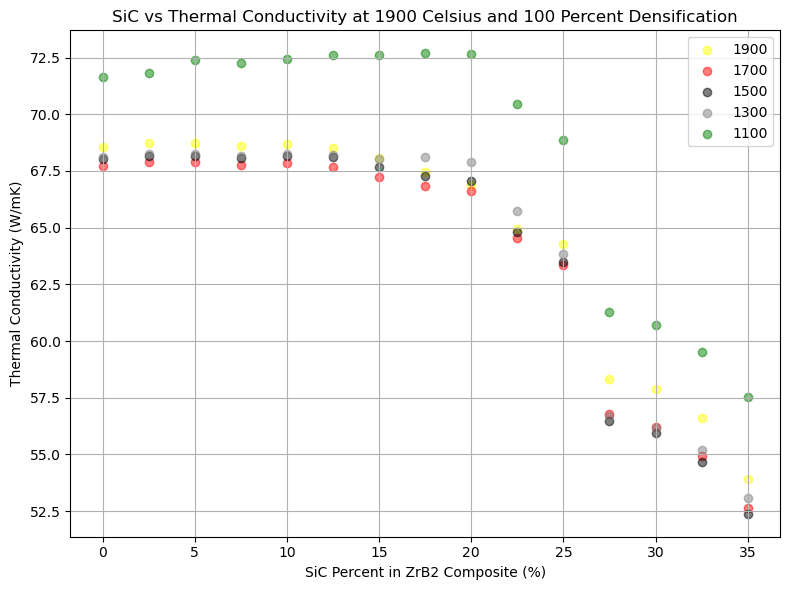

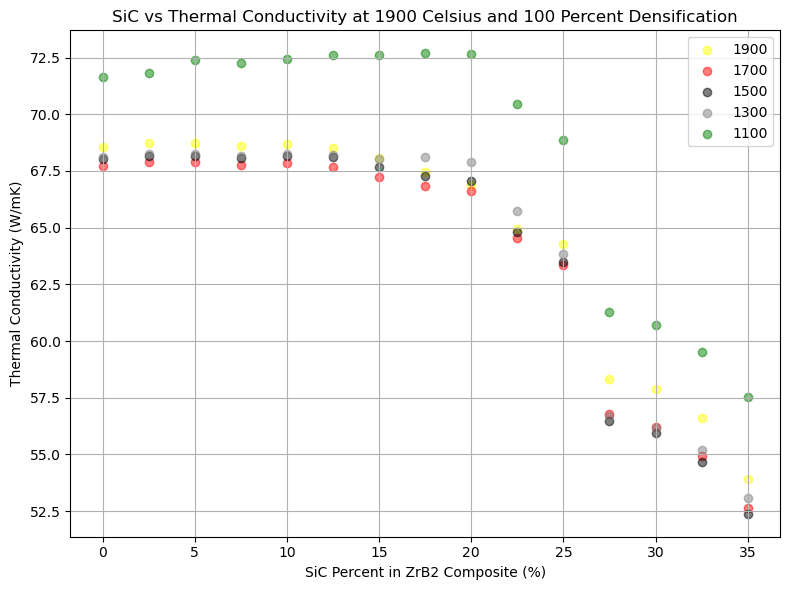

In [121]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Scatter plot for the first segment (0-14)
plt.scatter(dataframe['SiC'][0:15], dataframe['Thermal Conductivity'][0:15], color='yellow', alpha=0.5, label='1900')  

# Scatter plot for the second segment (15-29)
plt.scatter(dataframe['SiC'][15:30], dataframe['Thermal Conductivity'][15:30], color='red', alpha=0.5, label='1700')

# Scatter plot for the third segment (30-44)
plt.scatter(dataframe['SiC'][30:45], dataframe['Thermal Conductivity'][30:45], color='black', alpha=0.5, label='1500')

# Scatter plot for the fourth segment (45-59)
plt.scatter(dataframe['SiC'][45:60], dataframe['Thermal Conductivity'][45:60], color='grey', alpha=0.5, label='1300')
plt.scatter(dataframe['SiC'][60:75], dataframe['Thermal Conductivity'][60:75], color='green', alpha=0.5, label='1100')

# Add title and labels
plt.title('SiC vs Thermal Conductivity at 1900 Celsius and 100 Percent Densification')  
plt.xlabel('SiC Percent in ZrB2 Composite (%)') 
plt.ylabel('Thermal Conductivity (W/mK)')  

# Add grid
plt.grid(True) 

# Add legend to distinguish the segments
plt.legend()

# Adjust layout
plt.tight_layout()  

# Save the plot
plt.savefig('SiC_conc_vs_Thermal_Conductivity.png')

# Show the plot
plt.show()


In [122]:
X_oxide_test = dataframe[['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',"Oxidation Test",
       'Temp', 'Time@Temp (min)',"Thermal Conductivity" ]]

y_predict_oxide = best_model2.predict(X_oxide_test)

In [123]:
dataframe["Oxide Thickness"] = y_predict_oxide
dataframe
dataframe.to_csv('oxide_scale_thickness_vs_SiC_concentration.csv', index=False)

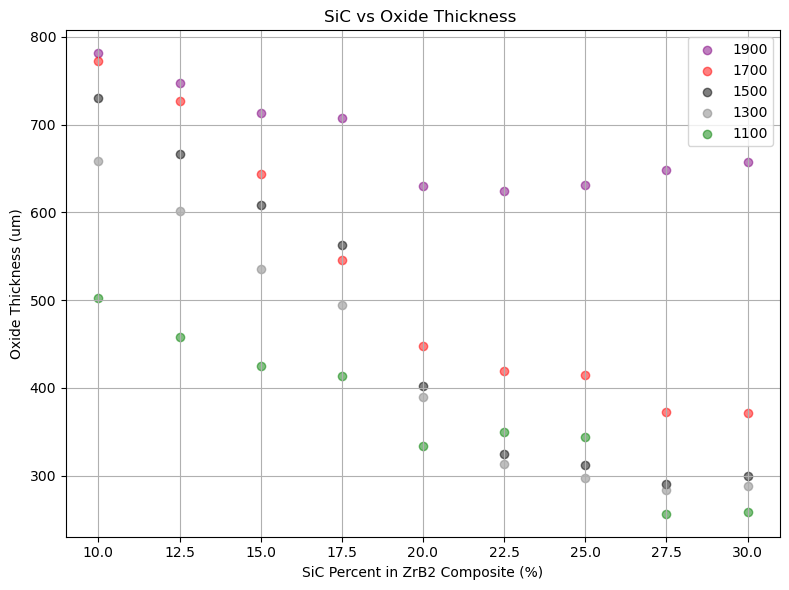

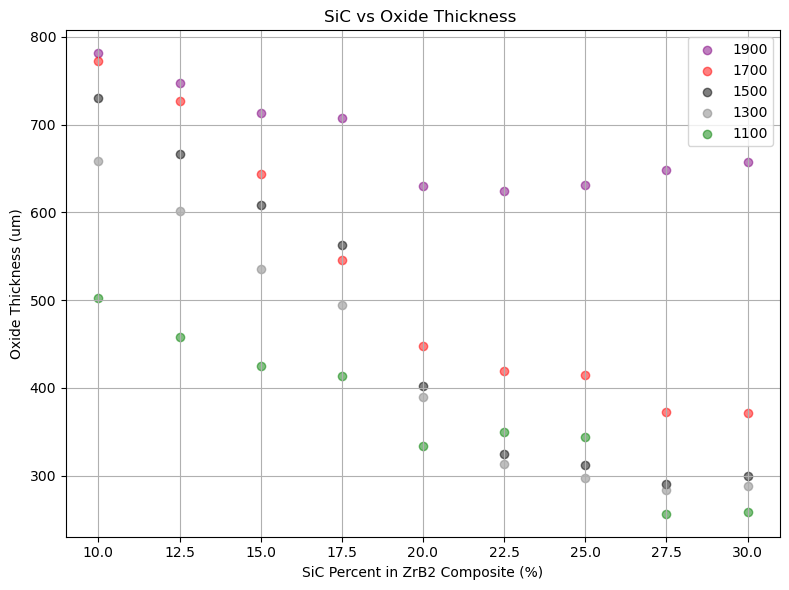

In [124]:
import matplotlib.pyplot as plt

# Create a figure and axis
plt.figure(figsize=(8, 6))

# Scatter plot for the first segment (0-14)
plt.scatter(dataframe['SiC'][4:13], dataframe['Oxide Thickness'][4:13], color='purple', alpha=0.5, label='1900')  

# Scatter plot for the second segment (15-29)
plt.scatter(dataframe['SiC'][19:28], dataframe['Oxide Thickness'][19:28], color='red', alpha=0.5, label='1700')

# Scatter plot for the third segment (30-44)
plt.scatter(dataframe['SiC'][34:43], dataframe['Oxide Thickness'][34:43], color='black', alpha=0.5, label='1500')

# Scatter plot for the fourth segment (45-59)
plt.scatter(dataframe['SiC'][49:58], dataframe['Oxide Thickness'][49:58], color='grey', alpha=0.5, label='1300')
plt.scatter(dataframe['SiC'][64:73], dataframe['Oxide Thickness'][64:73], color='green', alpha=0.5, label='1100')

# Add title and labels
plt.title('SiC vs Oxide Thickness ')  
plt.xlabel('SiC Percent in ZrB2 Composite (%)') 
plt.ylabel('Oxide Thickness (um)')  

# Add grid
plt.grid(True) 

# Add legend to distinguish the segments
plt.legend()

# Adjust layout
plt.tight_layout()  

# Save the plot
plt.savefig('SiC_conc_vs_Thermal_Conductivity.png')

# Show the plot
plt.show()


In [125]:
Dataframe=pd.read_csv('oxide_scale_thickness_vs_temp.csv')
print(Dataframe.columns)

Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label',
       'Thermal Conductivity', 'Oxide Thickness'],
      dtype='object')
Index(['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',
       'Temp', 'Oxidation Test', 'Time@Temp (min)', 'Label',
       'Thermal Conductivity', 'Oxide Thickness'],
      dtype='object')


In [126]:
X_testin = Dataframe[['ZrB2', 'SiC', 'ZrC', 'ZrSi2', 'MoSi2', 'B4C', 'Si3N4', 'TaSi2',
       'Sinter method', 'Sinter temp', 'Relative Density', 'Temp']]

In [127]:
y_predictio = best_model.predict(X_testin)

In [128]:
Dataframe["Thermal Conductivity"] = y_predictio
Dataframe

,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label,Thermal Conductivity,Oxide Thickness
0,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,66.875836,632.81475
1,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1850.0,1,60.0,4,66.558665,517.67150
2,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1800.0,1,60.0,4,66.314624,475.00325
3,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1750.0,1,60.0,4,66.622246,461.30050
4,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1700.0,1,60.0,4,66.622246,434.49525
5,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1650.0,1,60.0,4,66.751038,406.55525
6,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1600.0,1,60.0,4,66.970240,434.70750
7,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1550.0,1,60.0,4,67.127780,426.24000
8,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1500.0,1,60.0,4,67.048969,428.37500
9,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,135.0,4,66.875836,605.71975


,ZrB2,HfB2,SiC,TaB2,Ta,C,ZrC,ZrSi2,MoSi2,B4C,...,Sinter temp,Sintering Pressure (Mpa),Sintering Time (min),Relative Density,Temp,Oxidation Test,Time@Temp (min),Label,Thermal Conductivity,Oxide Thickness
0,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,60.0,4,66.875836,632.81475
1,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1850.0,1,60.0,4,66.558665,517.67150
2,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1800.0,1,60.0,4,66.314624,475.00325
3,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1750.0,1,60.0,4,66.622246,461.30050
4,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1700.0,1,60.0,4,66.622246,434.49525
5,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1650.0,1,60.0,4,66.751038,406.55525
6,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1600.0,1,60.0,4,66.970240,434.70750
7,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1550.0,1,60.0,4,67.127780,426.24000
8,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1500.0,1,60.0,4,67.048969,428.37500
9,80.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2000.0,30,60,100.0,1900.0,1,135.0,4,66.875836,605.71975


In [129]:
X_oxide_tes = Dataframe[['ZrB2', 'HfB2', 'SiC', 'TaB2', 'Ta', 'C', 'ZrC', 'ZrSi2', 'MoSi2',
       'B4C', 'Si3N4', 'TaSi2', 'WC', 'WB', 'MoSi', 'HfC', 'BN', 'TaC',
       'Ta5Si3', 'LaB6', 'HfSi2', 'ZrO2', 'Sinter method', 'Sinter temp',
       'Sintering Pressure (Mpa)', 'Sintering Time (min)', 'Relative Density',"Oxidation Test",
       'Temp', 'Time@Temp (min)',"Thermal Conductivity" ]]

y_predict_oxid = best_model2.predict(X_oxide_tes)

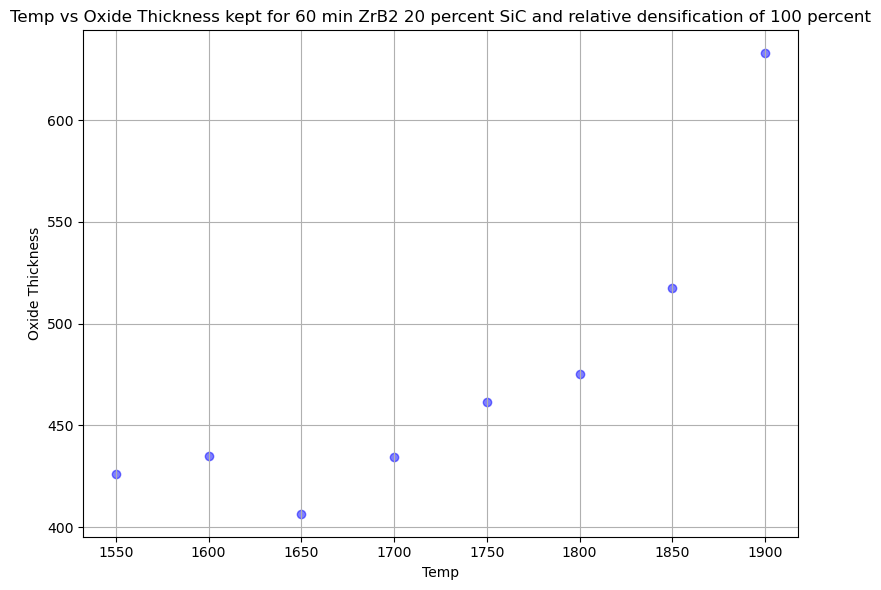

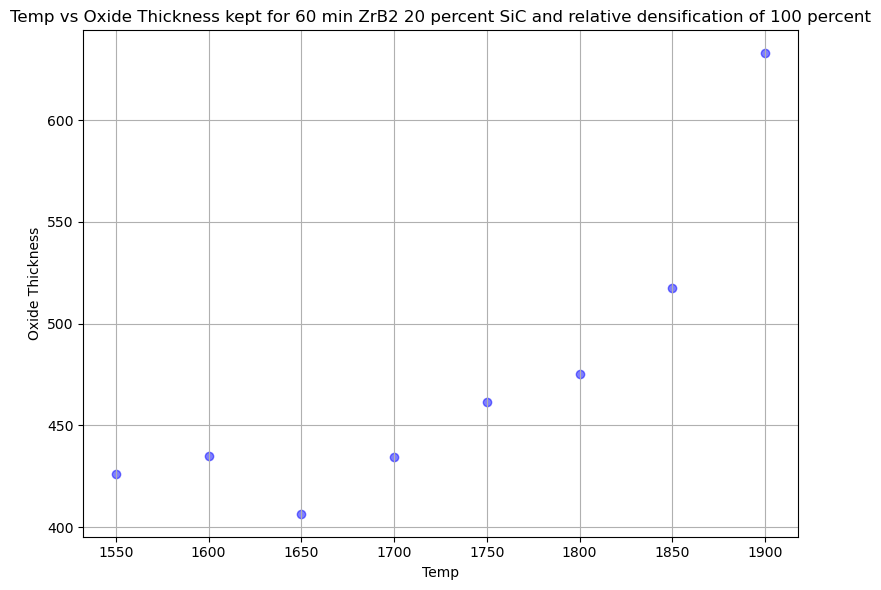

In [130]:
import matplotlib.pyplot as plt

# Assuming Dataframe is your DataFrame
# If your DataFrame is not named Dataframe, replace Dataframe with your DataFrame name

plt.figure(figsize=(8, 6))
plt.scatter(Dataframe['Temp'].iloc[:8], Dataframe['Oxide Thickness'].iloc[:8], color='blue', alpha=0.5)
plt.title('Temp vs Oxide Thickness kept for 60 min ZrB2 20 percent SiC and relative densification of 100 percent')
plt.xlabel('Temp')
plt.ylabel('Oxide Thickness')
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('temp_vs_oxide_thickness.png')

# Display the plot
plt.show()
